In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

#### Dataset Discription
___

Dataset : Seeds  
Obtained from kaggle https://www.kaggle.com/datasets/rwzhang/seeds-dataset  
The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment.  
Has 10 columns (All except 'Unnamed: 8' and 'Unnamed: 9' used in this prediction)

In [2]:
# Read the data from the csv file
df_rawData = pd.read_csv('seeds_dataset.csv')

In [3]:
# Checking to see how many rows we have in this dataset
df_rawData.shape[0]

210

In [4]:
df_rawData

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)",Unnamed: 8,Unnamed: 9
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,NaN,NaN
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,NaN,NaN
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,NaN,NaN
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,NaN,NaN
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,NaN,NaN
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,NaN,NaN
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,NaN,NaN
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,NaN,NaN


### Clean and re-Organize Data
Drop 'Unnamed: 8' and 'Unnamed: 9'  
Change 'Class (1, 2, 3)' to 'Variety'  
___

In [5]:
# Drop unwanted columns
df_rawData.drop(['Unnamed: 8', 'Unnamed: 9'], axis='columns', inplace=True)

In [6]:
# Rename the variety column
df_rawData = df_rawData.rename(columns={'Class (1, 2, 3)': 'Variety'})
df_rawData.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


You can also use a combination of these columns to get better clustering results. For example, you could use the Area, Compactness, Length, and Width columns to cluster the wheat seeds based on their physical characteristics. Or, you could use the Kernel weight, Hulless kernel weight, Asymmetry coefficient, Length of groove, Kurtosis, and Skewness columns to cluster the wheat seeds based on their kernel characteristics.

In [7]:
# Find out the unique seed varieties in the dataset.
df_rawData['Variety'].unique()

array([1, 2, 3], dtype=int64)

### CREATE VARIABLES HERE (FROM THE TABLE COLUMNS)
Choose the columns that we need to use and place them in the variables names 'first_value' and 'second_value' 

In [8]:
# Place them here
first_value = 'Perimeter' # Replace this with your desired columns
second_value = 'Compactness'

### Using 'Perimeter' and 'Compactness' 

In [9]:
# Set the number of clusters (3 here because we know our dataset has 3 varieties of seeds) 
km = KMeans(n_clusters=3) # Compiles the model
y_predicted = km.fit_predict(df_rawData[[first_value, second_value]]) # Fit is where the training happens. (Fit_Predict does the training first and then does the prediction. ) 
y_predicted

c:\Users\edemq\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
# Just randomly checking the predicted values.
y_predicted[30:180]

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
# Create a new column called cluster where it shows the clusters predicted
df_rawData['cluster'] = y_predicted
#df_rawData.head()
df_rawData[[first_value, second_value, 'cluster']].head()

,Perimeter,Compactness,cluster
0,14.84,0.8710,2
1,14.57,0.8811,2
2,14.09,0.9050,2
3,13.94,0.8955,1
4,14.99,0.9034,2


In [12]:
# Checking to see the unique cluster values (We chose 3)
df_rawData.cluster.unique()

array([2, 1, 0])

 *Data Filtering*
___

In [13]:
# Filtering the data into their respective cluster variables.
cluster_0 = df_rawData[df_rawData.cluster==0]
cluster_1 = df_rawData[df_rawData.cluster==1]
cluster_2 = df_rawData[df_rawData.cluster==2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


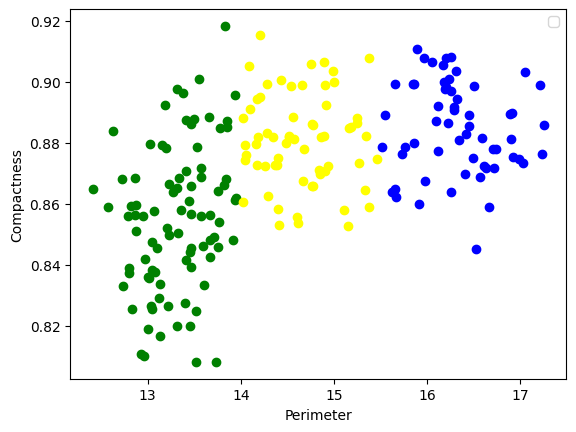

In [14]:
# Make a scatter plot of the dataset using the 3 clusters

# Experiment using the 'Perimeter' and the 'Compactness'
plt.scatter(cluster_0[first_value],cluster_0[second_value],color='blue')
plt.scatter(cluster_1[first_value],cluster_1[second_value],color='green')
plt.scatter(cluster_2[first_value],cluster_2[second_value],color='yellow')

#Label the axes
plt.xlabel(first_value)
plt.ylabel(second_value)
plt.legend()


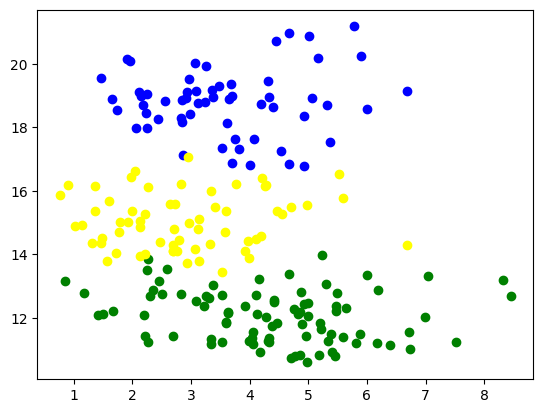

In [15]:
# Experiment using the other columns from the orignal table
experi_1 = ''
experi_2 = ''

plt.scatter(cluster_0['Asymmetry coefficient'],cluster_0['Area'],color='blue')
plt.scatter(cluster_1['Asymmetry coefficient'],cluster_1['Area'],color='green')
plt.scatter(cluster_2['Asymmetry coefficient'],cluster_2['Area'],color='yellow')

In [16]:
# It displays the x and y values for the centroid
km.cluster_centers_

array([[16.32915254,  0.88474746],
       [13.30943182,  0.85482273],
       [14.64761905,  0.88071746]])

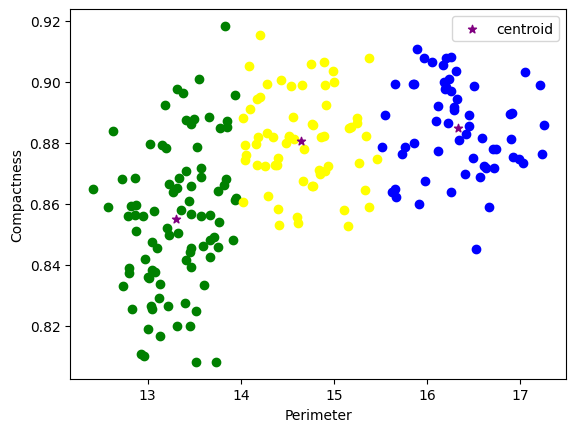

In [17]:
# Displaying a new scatter plot with the centroid added. 
plt.scatter(cluster_0[first_value],cluster_0[second_value],color='blue')
plt.scatter(cluster_1[first_value],cluster_1[second_value],color='green')
plt.scatter(cluster_2[first_value],cluster_2[second_value],color='yellow')

# Plot the centroid values into the scatter plot
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color= 'purple', marker='*', label='centroid')

#Label the axes
plt.xlabel(first_value)
plt.ylabel(second_value)
plt.legend()

### Scaling the data

In [18]:
df_rawData[[first_value, second_value]]

,Perimeter,Compactness
0,14.84,0.8710
1,14.57,0.8811
2,14.09,0.9050
3,13.94,0.8955
4,14.99,0.9034
...,...,...
205,13.20,0.8783
206,12.88,0.8511
207,13.66,0.8883
208,13.21,0.8521


In [19]:
scaler = MinMaxScaler()

scaler.fit(df_rawData[[first_value]])
df_rawData[first_value] = scaler.transform(df_rawData[[first_value]])

scaler.fit(df_rawData[[second_value]])
df_rawData[second_value] = scaler.transform(df_rawData[[second_value]])

In [20]:
# Notice how the values have changed from before (Now in smaller numbers between 0 and 1)
df_rawData[[first_value, second_value]]

,Perimeter,Compactness
0,0.502066,0.570780
1,0.446281,0.662432
2,0.347107,0.879310
3,0.316116,0.793103
4,0.533058,0.864791
...,...,...
205,0.163223,0.637024
206,0.097107,0.390200
207,0.258264,0.727768
208,0.165289,0.399274


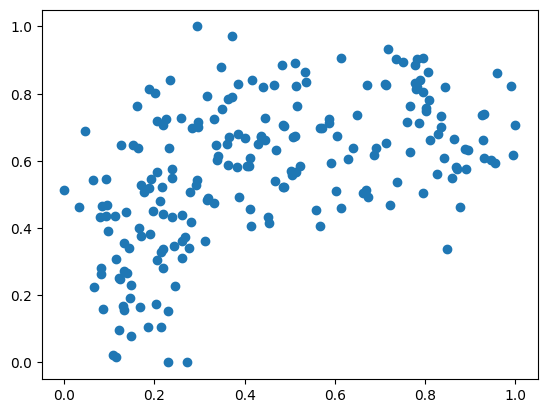

In [21]:
# Show the scatter plot again (Notice how the general plot is still the same as the previous)
plt.scatter(df_rawData[first_value], df_rawData[second_value])

### Repeat the process all over again to check for any difference
_ _ _

In [22]:
km = KMeans(n_clusters=3) # Compiles the model
y_predicted = km.fit_predict(df_rawData[[first_value, second_value]])
y_predicted

c:\Users\edemq\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [23]:
# Create a new column called cluster where it shows the clusters predicted
df_rawData['cluster'] = y_predicted
#df_rawData.head()
df_rawData[[first_value, second_value, 'cluster']].head()


,Perimeter,Compactness,cluster
0,0.502066,0.570780,1
1,0.446281,0.662432,1
2,0.347107,0.879310,1
3,0.316116,0.793103,1
4,0.533058,0.864791,1


In [24]:
km.cluster_centers_

array([[0.16429063, 0.31218996],
       [0.37097979, 0.6615573 ],
       [0.7851548 , 0.68985833]])

In [25]:
cluster_0 = df_rawData[df_rawData.cluster==0]
cluster_1 = df_rawData[df_rawData.cluster==1]
cluster_2 = df_rawData[df_rawData.cluster==2]

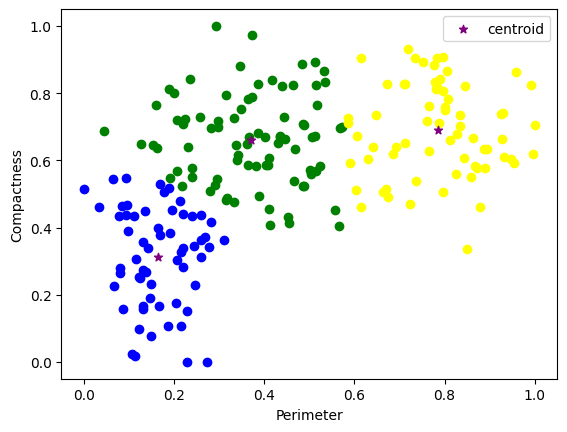

In [26]:
# Displaying a new scatter plot with the centroid added. 
plt.scatter(cluster_0[first_value],cluster_0[second_value],color='blue')
plt.scatter(cluster_1[first_value],cluster_1[second_value],color='green')
plt.scatter(cluster_2[first_value],cluster_2[second_value],color='yellow')

# Plot the centroid values into the scatter plot
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color= 'purple', marker='*', label='centroid')

#Label the axes
plt.xlabel(first_value)
plt.ylabel(second_value)
plt.legend()

**Elbow Plot**

In [27]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_rawData)
    sse.append(km.inertia_)

c:\Users\edemq\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\edemq\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\edemq\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\edemq\Python3114\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

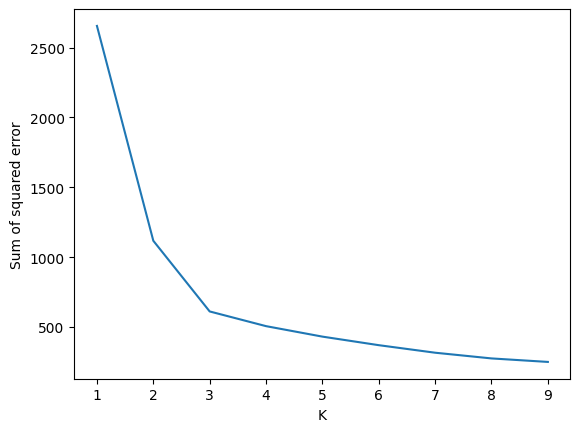

In [28]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

### Training / Test split Experimenting
___